In [1]:
import psycopg2
import pandas.io.sql as pandasql
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0,0.5,'Cummulative Sum')

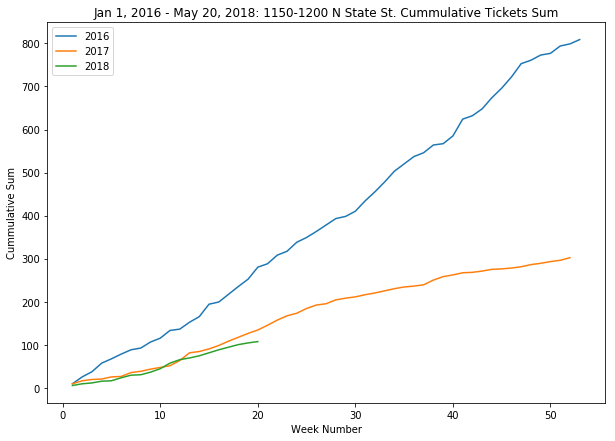

In [10]:
conn = psycopg2.connect("dbname=tickets host=localhost user=tickets password=tickets")
sqlstr = """
    SELECT
    extract(week from iss_dt_time) as week_no,
    extract(year from iss_dt_time) as year,
    count(extract(doy from iss_dt_time))
    FROM new_tickets 
    WHERE ST_DIR = 'N' AND ST_NUM >= 1150 AND ST_NUM < 1200
    AND ST_NM LIKE 'STATE %'
    GROUP BY week_no, year
    ORDER BY year, week_no"""

df = pandasql.read_sql(sqlstr, conn)
df['cumsum'] = df.groupby('year')['count'].transform(pd.Series.cumsum)

fig, ax = plt.subplots(figsize=(10,7))

df = df.groupby('year')
title = 'Jan 1, 2016 - May 20, 2018: 1150-1200 N State St. Cummulative Tickets Sum'
df.plot(y='cumsum',x='week_no', ax=ax, title=title)
ax.legend(["2016","2017","2018"])
ax.set_xlabel('Week Number')
ax.set_ylabel('Cummulative Sum')

Text(0,0.5,'Cummulative Sum')

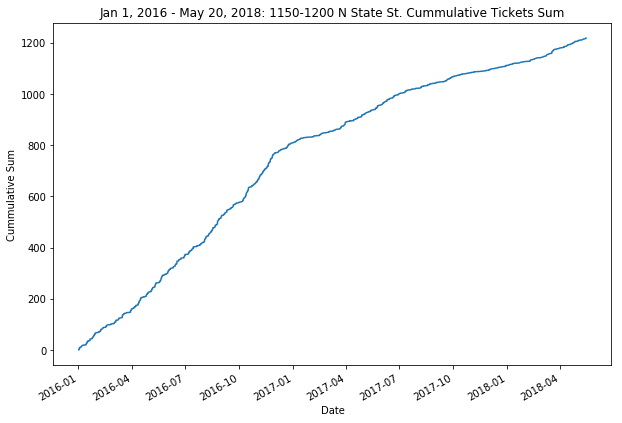

In [3]:
sqlstr = """
    SELECT
    1 as cumsum, iss_dt_time
    FROM new_tickets 
    WHERE ST_DIR = 'N' AND ST_NUM >= 1150 AND ST_NUM < 1200
    AND ST_NM LIKE 'STATE %'
    ORDER BY iss_dt_time"""

df = pandasql.read_sql(sqlstr, conn, index_col='iss_dt_time')
fig, ax = plt.subplots(figsize=(10,7))
title = 'Jan 1, 2016 - May 20, 2018: 1150-1200 N State St. Cummulative Tickets Sum'
df.cumsum().plot(y='cumsum',ax=ax, title=title, legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Cummulative Sum')

Text(0,0.5,'Cummulative Sum')

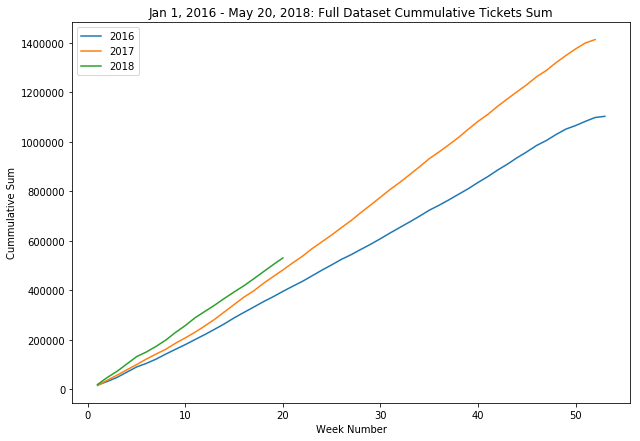

In [11]:
sqlstr = """
    SELECT
    extract(week from iss_dt_time) as week,
    extract(year from iss_dt_time) as year,
    count(extract(week from iss_dt_time)) as count
    FROM new_tickets 
    GROUP BY week, year
    ORDER BY year, week"""

fig, ax = plt.subplots(figsize=(10,7))


df = pandasql.read_sql(sqlstr, conn)
df['cumsum'] = df.groupby('year')['count'].transform(pd.Series.cumsum)

df = df.groupby('year')
title = 'Jan 1, 2016 - May 20, 2018: Full Dataset Cummulative Tickets Sum'
df.plot(y='cumsum', x='week', ax=ax, title=title)
ax.legend(['2016', '2017', '2018'])
ax.set_xlabel('Week Number')
ax.set_ylabel('Cummulative Sum')